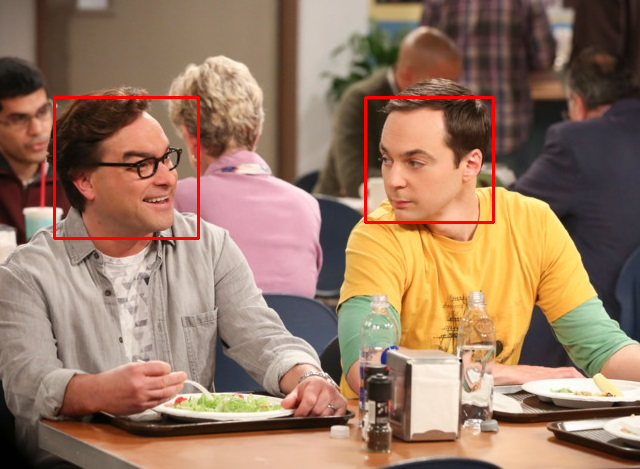

In [1]:
import cv2
import numpy as np
from detector import run as detect
from PIL import Image
from IPython.display import display

im = cv2.imread('./samples/bbt2.jpg')[:480,:640]
boxes = detect(im[...,::-1])
teaser = im[...,::-1].copy()
for b in boxes:
    b = (b[:4]).astype(np.int32)
    cv2.rectangle(teaser, b[:2], b[2:], (255,0,0), 2)

display(Image.fromarray(teaser))